This notebook is about analyzing the 'world happiness data' from the year 2015-2021 to gain insights from the data and to understand which factors effects the 'happiness score and economy' i.e GDP of a country and how the countries have performed over the years.Further 'kmeans clustering' have been performed on the '2021 world happiness data' based on several factors such as GDP per capita, life expectancy, corruption,social support etc to form clusters of countries according to these factors

In [1]:
import plotly as py
import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Loading data into the notebook

In [2]:
data_2k15 = pd.read_csv('2015.csv')
data_2k16 = pd.read_csv('2016.csv')
data_2k17 = pd.read_csv('2017.csv')
data_2k18 = pd.read_csv('2018.csv')
data_2k19 = pd.read_csv('2019.csv')
data_2k20 = pd.read_csv('2020.csv')
data_2k21 = pd.read_csv('world-happiness-report-2021.csv')

In [3]:
data_2k15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data_2k15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
data_2k16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
data_2k16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [7]:
data_2k17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
data_2k17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [9]:
data_2k18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [10]:
data_2k18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [11]:
data_2k18['Perceptions of corruption'] = data_2k18['Perceptions of corruption'].fillna(0)

In [12]:
data_2k19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
data_2k19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [14]:
data_2k20.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [15]:
data_2k20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [16]:
data_2k21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [17]:
data_2k21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

The dataset is already cleaned and there was only one NaN value in the year 2018

Plotting top 5 and bottom 5 countries on the basis of their happiness score

In [18]:
happy_top5 = data_2k21.groupby('Country name')['Ladder score'].max().sort_values(ascending=False).head(5).reset_index()
happy_lower5 = data_2k21.groupby('Country name')['Ladder score'].max().sort_values(ascending=False).tail(5).reset_index()
new_data = pd.concat([happy_top5,happy_lower5],axis=0)
new_data.columns = ['Country','Score']
new_data

,Country,Score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
0,Lesotho,3.512
1,Botswana,3.467
2,Rwanda,3.415
3,Zimbabwe,3.145
4,Afghanistan,2.523


(0.0, 8.0)

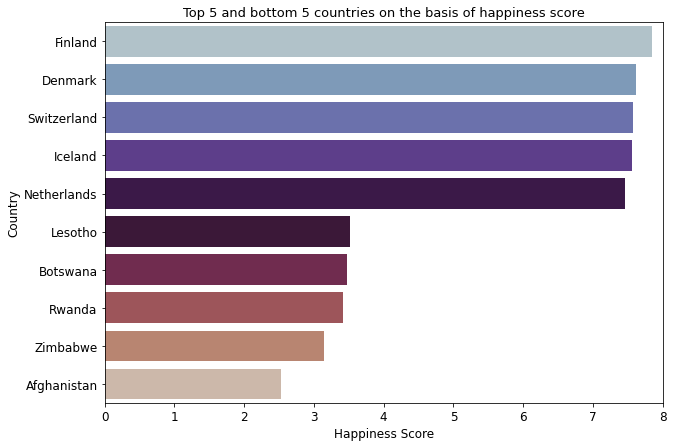

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(y = new_data["Country"], x = new_data["Score"],palette='twilight',orient = "h")
plt.title("Top 5 and bottom 5 countries on the basis of happiness score",fontsize=13)
plt.xlabel("Happiness Score", fontsize= 12)
plt.ylabel("Country", fontsize= 12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlim(0,8)

Plotting happiness score of top 30 countries from 2015-2021 through plotly

In [20]:
df2015 = data_2k15.iloc[:30,:]
df2016 = data_2k16.iloc[:30,:]
df2017 = data_2k17.iloc[:30,:]
df2018 = data_2k18.iloc[:30,:]
df2019 = data_2k19.iloc[:30,:]
df2020 = data_2k20.iloc[:30,:]
df2021 = data_2k21.iloc[:30,:]

# Creating curve1
curve1 = go.Scatter(x = df2015['Country'],
                    y = df2015['Happiness Score'],
                    mode = "lines+markers",
                    name = "2015",
                    marker = dict(color = 'red'),
                    text= df2015.Country)

# Creating curve2
curve2 = go.Scatter(x = df2015['Country'],
                    y = df2016['Happiness Score'],
                    mode = "lines+markers",
                    name = "2016",
                    marker = dict(color = 'blue'),
                    text= df2015.Country)

# Creating curve3
curve3 = go.Scatter(x = df2015['Country'],
                    y = df2017['Happiness.Score'],
                    mode = "lines+markers",
                    name = "2017",
                    marker = dict(color = 'green'),
                    text= df2015.Country)

# Creating curve4
curve4 = go.Scatter(x = df2015['Country'],
                    y = df2018['Score'],
                    mode = "lines+markers",
                    name = "2018",
                    marker = dict(color = 'black'),
                    text= df2015.Country)

# Creating curve5
curve5 = go.Scatter(x = df2015['Country'],
                    y = df2019['Score'],
                    mode = "lines+markers",
                    name = "2019",
                    marker = dict(color = 'pink'),
                    text= df2015.Country)


# Creating curve6
curve6 = go.Scatter(x = df2015['Country'],
                    y = df2020['Ladder score'],
                    mode = "lines+markers",
                    name = "2020",
                    marker = dict(color = 'purple'),
                    text= df2015.Country)

# Creating curve7
curve7 = go.Scatter(x = df2015['Country'],
                    y = df2021['Ladder score'],
                    mode = "lines+markers",
                    name = "2021",
                    marker = dict(color = 'orange'),
                    text= df2015.Country)


data = [curve1, curve2, curve3, curve4, curve5,curve6,curve7]
layout = dict(title = 'Happiness score of top 30 countries from 2015 to 2021',
              xaxis= dict(title= 'Countries'),
              yaxis= dict(title= 'Happiness Score'),
              hovermode="x unified"
             )

fig = dict(data = data, layout = layout)
iplot(fig)

Plotting happiness score of the countries on wolrd map

In [21]:
data = dict(
        type = 'choropleth',
        marker_line_width=1,
        locations = data_2k15['Country'],
        locationmode = "country names",
        z = data_2k21['Ladder score'],
        text = data_2k15['Country'],
        colorbar = {'title' : 'Happiness score'})
layout = dict(title = 'Happiness Map for the year 2021',
                  geo = dict(projection = {'type':'mercator'})
                 )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)


Plotting top 5 and bottom 5 countries on the basis of their GDP per capita

In [22]:
gdp_top5 = data_2k21.groupby('Country name')['Logged GDP per capita'].max().sort_values(ascending=False).head(5).reset_index()
gdp_lower5 = data_2k21.groupby('Country name')['Logged GDP per capita'].max().sort_values(ascending=False).tail(5).reset_index()
new_data = pd.concat([gdp_top5,gdp_lower5],axis=0)
new_data.columns = ['Country','GDP']
new_data

,Country,GDP
0,Luxembourg,11.647
1,Singapore,11.488
2,Ireland,11.342
3,Switzerland,11.117
4,United Arab Emirates,11.085
0,Liberia,7.288
1,Mozambique,7.158
2,Niger,7.098
3,Malawi,6.958
4,Burundi,6.635


(0.0, 14.0)

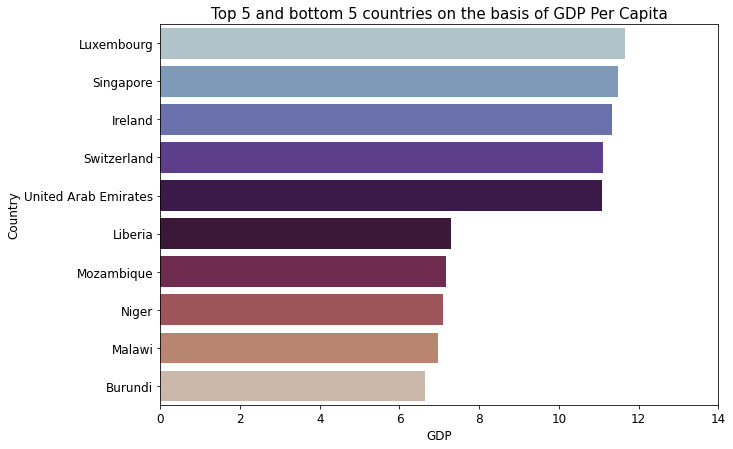

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(y=new_data['Country'], x=new_data['GDP'], palette='twilight', orient='h')
plt.title('Top 5 and bottom 5 countries on the basis of GDP Per Capita', fontsize=15)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 14)

In [24]:
data_2k15['Year']='2015'
data_2k16['Year']='2016'
data_2k17['Year']='2017'
data_2k18['Year']='2018'
data_2k19['Year']='2019'
data_2k20['Year']='2020'
data_2k21['Year']='2021'

Plotting a line plot to visualize the GDP of various countries over the years

In [25]:
data_2k15.rename(columns={'Economy (GDP per Capita)':'GDP per capita'},inplace=True)
data1=data_2k15.filter(['Country','GDP per capita',"Year"],axis=1)

data_2k16.rename(columns={'Economy (GDP per Capita)':'GDP per capita'},inplace=True)
data2=data_2k16.filter(['Country','GDP per capita',"Year"],axis=1)

data_2k17.rename(columns={'Economy..GDP.per.Capita.':'GDP per capita'},inplace=True)
data3=data_2k17.filter(['Country','GDP per capita','Year'],axis=1)

data_2k18.rename(columns={'Country or region':'Country'},inplace=True)
data4=data_2k18.filter(['Country','GDP per capita',"Year"],axis=1)

data_2k19.rename(columns={'Country or region':'Country'},inplace=True)
data5=data_2k19.filter(['Country','GDP per capita','Year'],axis=1)

data_2k20.rename(columns={'Country name':'Country','Explained by: Log GDP per capita':'GDP per capita'},inplace=True)
data6=data_2k20.filter(['Country','GDP per capita','Year'],axis=1)

data_2k21.rename(columns={'Country name':'Country','Explained by: Log GDP per capita':'GDP per capita'},inplace=True)
data7=data_2k21.filter(['Country','GDP per capita','Year'],axis=1)


data1=data1.append([data2,data3,data4,data5,data6,data7])

Text(0.5, 1.0, 'GDP per capita 2015-2021')

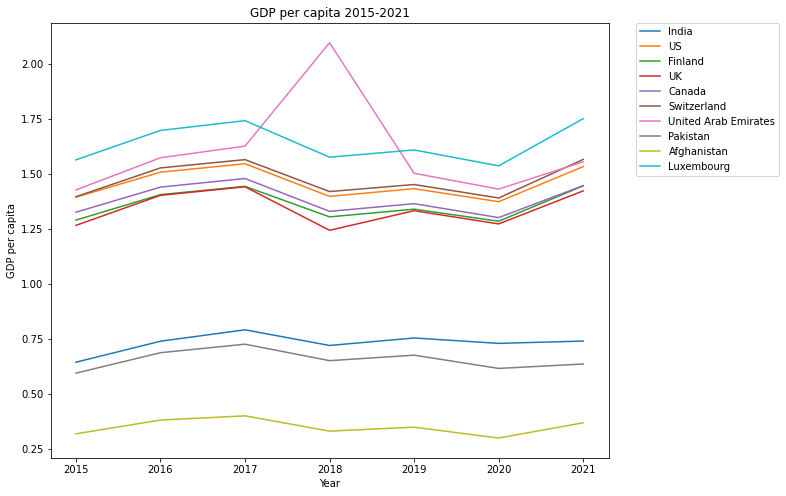

In [26]:
plt.figure(figsize=(10,8))
df = data1[data1['Country']=='India']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='India')

df = data1[data1['Country']=='United States']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='US')

df = data1[data1['Country']=='Finland']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='Finland')

df = data1[data1['Country']=='United Kingdom']
sns.lineplot(x="Year", y="GDP per capita",data=df,label="UK")

df = data1[data1['Country']=='Canada']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='Canada')

df = data1[data1['Country']=='Switzerland']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='Switzerland')

df = data1[data1['Country']=='United Arab Emirates']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='United Arab Emirates')

df = data1[data1['Country']=='Pakistan']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='Pakistan')

df = data1[data1['Country']=='Afghanistan']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='Afghanistan')

df = data1[data1['Country']=='Luxembourg']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='Luxembourg')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("GDP per capita 2015-2021")

Plotting heatmap of the data to show correlation between various features

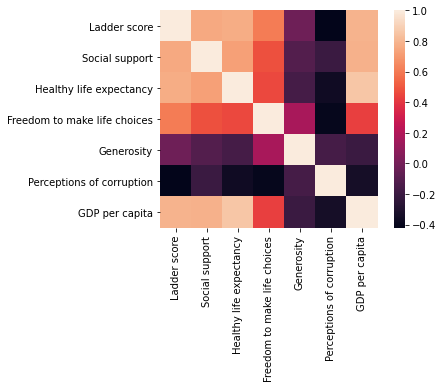

In [27]:
dcr =data_2k21.drop(['Standard error of ladder score', 'Logged GDP per capita','upperwhisker', 'lowerwhisker','Ladder score in Dystopia',
       'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
        'Dystopia + residual'],axis=1)
cor = dcr.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

This heatmap represents the correlation between various features of the data.It can be seen that the ladder score i.e the happiness score mostly depends on features like 'GDP per capita,social support,healthy life expectancy and freedom to make life choices'.It is least correlated with ''generosity' and 'Perception of corruption'.

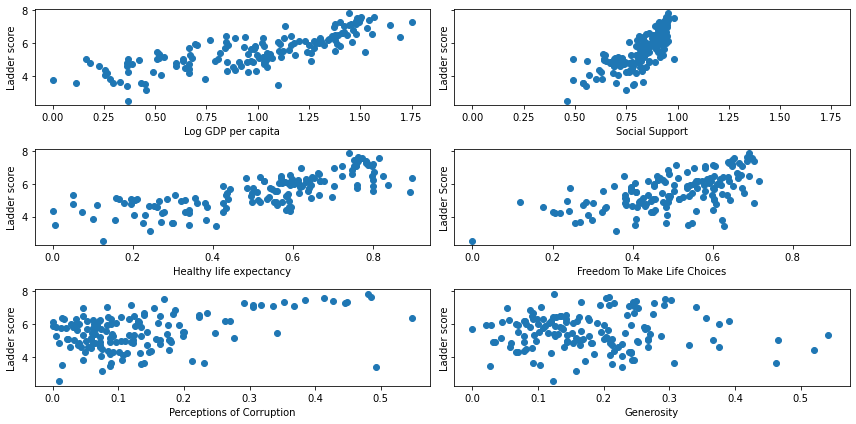

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6), sharey='row', sharex='row')

axes[0, 0].scatter(x=data_2k21['GDP per capita'], y=data_2k21['Ladder score'])
axes[0, 0].set_xlabel('Log GDP per capita')
axes[0, 0].set_ylabel('Ladder score')

axes[0, 1].scatter(x=data_2k21['Social support'], y=data_2k21['Ladder score'])
axes[0, 1].set_xlabel('Social Support')
axes[0, 1].set_ylabel('Ladder score')



axes[1, 0].scatter(x=data_2k21['Explained by: Healthy life expectancy'], y=data_2k21['Ladder score'])
axes[1, 0].set_xlabel('Healthy life expectancy')
axes[1, 0].set_ylabel('Ladder score')

axes[1, 1].scatter(x=data_2k21['Explained by: Freedom to make life choices'], y=data_2k21['Ladder score'])
axes[1, 1].set_xlabel('Freedom To Make Life Choices')
axes[1, 1].set_ylabel('Ladder Score')


axes[2, 0].scatter(x=data_2k21['Explained by: Perceptions of corruption'],y=data_2k21['Ladder score'])
axes[2, 0].set_xlabel('Perceptions of Corruption')
axes[2, 0].set_ylabel('Ladder score')

axes[2, 1].scatter(x=data_2k21['Explained by: Generosity'], y=data_2k21['Ladder score'])
axes[2, 1].set_xlabel('Generosity')
axes[2, 1].set_ylabel('Ladder score')

fig.tight_layout()

From the above scatter plot, we can see that,except Perception Of Corruption every other thing like GDP Per Capita,Social Support,Healthy life Expectancy), Freedom To Choos & Generosity makes people happy.

Top Countries In The World By Happiness Factors are as:

- Happiest Country - Finland
- Highest GDP Per Capita (Economy) - Luxembourg
- Highest Social Support - Turkmenistan and Iceland
- High Healthy Life Expectancy Country - Singapore
- Highest score in freedom to make life choices - Norway and Uzbekistan
- Highest Perception of Corruption - Singapore
- Highest Generosity - Indonesia

In [33]:
df = data_2k21

trace = go.Bar( x = df['Regional indicator'],
                y = df['Country'].value_counts(),
                marker = dict(color = 'yellow',
                line=dict(color='black',width=1.5)),
                text = df['Country'],
                textposition='inside')

data = [trace]
layout = go.Layout(barmode = "group",
              title = 'Counts of Countries according to their Region - 2021',
              xaxis= dict(title= 'Countries'),
              yaxis= dict(title= 'Counts'))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Clustering of countries

Here we consider only eight parameters namely,happiness score,GDP per capita,social support,life expectancy,freedom,generosity, corruption and Dystopia residual for clustering the countries.

In [34]:
data = data_2k21[['Ladder score','GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption','Dystopia + residual']] 

Scaling data to get better results

In [35]:
ss = StandardScaler()
ss.fit_transform(data)

array([[ 2.15746188,  1.16227762,  1.21195053, ..., -0.55183758,
         3.03446416,  1.53529826],
       [ 1.95004606,  1.30110472,  1.21970244, ...,  0.30583027,
         3.06955896,  0.81679751],
       [ 1.90426509,  1.45976425,  1.10729981, ...,  0.26498894,
         2.43785246,  0.76267668],
       ...,
       [-1.97870855, -1.5200602 , -2.29191057, ...,  0.49982656,
         3.13974858, -2.49203841],
       [-2.23097103, -1.28950806, -0.55935978, ..., -0.21489664,
        -0.52765865, -2.28675248],
       [-2.81210905, -1.50518587, -3.07485298, ..., -0.57225825,
        -1.09794925, -0.99904984]])

K means Clustering

In [36]:
def Kmeans_clst(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = Kmeans_clst(data, 2)
kmeans = pd.DataFrame(clust_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

Plotting scatter plots between various features as a result of clustering

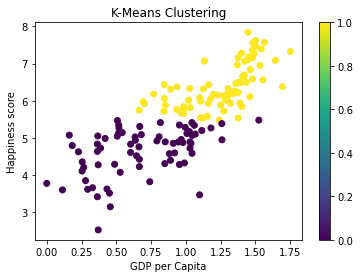

In [38]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['GDP per capita'],data['Ladder score'],c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Happiness score')
plt.colorbar(scatter)

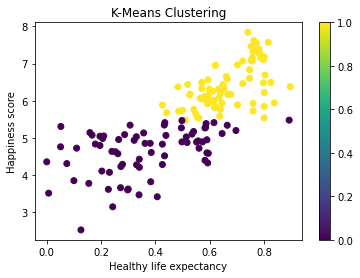

In [39]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Explained by: Healthy life expectancy'],data['Ladder score'],c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Healthy life expectancy')
ax.set_ylabel('Happiness score')
plt.colorbar(scatter)

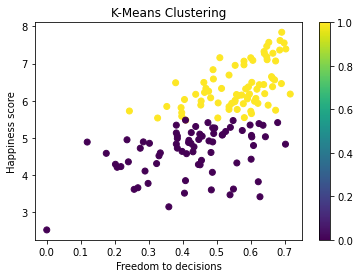

In [40]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Explained by: Freedom to make life choices'],data['Ladder score'],c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Freedom to decisions')
ax.set_ylabel('Happiness score')
plt.colorbar(scatter)

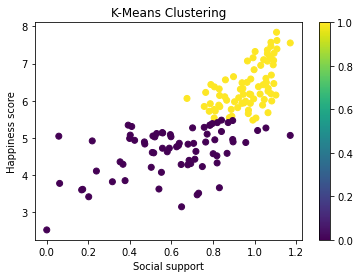

In [41]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Explained by: Social support'],data['Ladder score'],c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Social support')
ax.set_ylabel('Happiness score')
plt.colorbar(scatter)

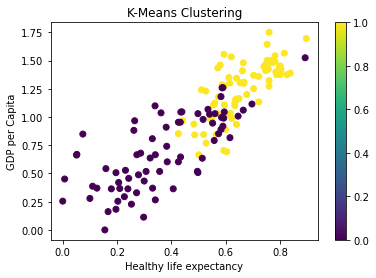

In [42]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Explained by: Healthy life expectancy'],data['GDP per capita'],c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_ylabel('GDP per Capita')
ax.set_xlabel('Healthy life expectancy')
plt.colorbar(scatter)

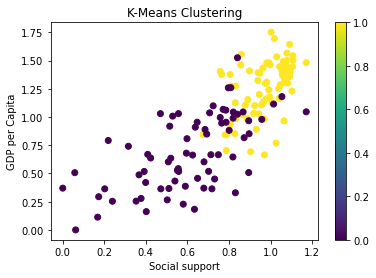

In [43]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Explained by: Social support'],data['GDP per capita'],c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_ylabel('GDP per Capita')
ax.set_xlabel('Social support')
plt.colorbar(scatter)

From the above plots,we can observe that the countries that have higher happiness score and GDP are clustered together.Higher  social support,healthy life expectancy and Freedom to make life choices ultimately contributes to higher happiness score and overall economy of a country.